In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import calendar
import os
import matplotlib.pyplot as plt

In [2]:
! ls -la

total 424
drwxr-xr-x@  6 terekhind  staff     192 Mar  9 16:29 .
drwxr-xr-x  22 terekhind  staff     704 Mar  9 14:36 ..
drwxr-xr-x@ 14 terekhind  staff     448 Mar  9 16:30 .git
drwxr-xr-x@  3 terekhind  staff      96 Mar  7 12:45 .ipynb_checkpoints
-rw-r--r--@  1 terekhind  staff      29 Mar  7 12:44 README.md
-rw-r--r--@  1 terekhind  staff  212188 Mar  9 16:29 data_analytics.ipynb


In [3]:
path = '../01_Blog_Feedback'

In [4]:
def get_files(path, test_dataset = False):
    df = pd.DataFrame()
    
    for filename in os.listdir(path):
        
        if test_dataset is True:
            if filename in ['blogData_train.csv', 'README.txt']:
                pass
            else:
                file = os.path.join(path, filename)
                temporaly_df = pd.read_csv(f'{file}', header=None)
                df = pd.concat([df, temporaly_df], ignore_index=True)
                
        else:
            if filename == 'blogData_train.csv':
                file = os.path.join(path, filename)
                df = pd.read_csv(f'{file}', header=None)
    return df
                

In [5]:
df_train = get_files(path) # Train dataset

In [6]:
df_train.shape

(52397, 281)

In [7]:
df_test = get_files(path, test_dataset = True) # Train dataset

In [8]:
df_test.shape

(7624, 281)

In [9]:
df_test.shape[0] / df_train.shape[0]  # 14,5 % is test_dataset

0.14550451361719183

## Data preprocessing

In [7]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0


In [8]:
df_train.rename(columns={50:'number_comments_before_basetime_total',51: 'number_comments_24_before_basetime',
                         52:'number_comments_between_48_24_before_basetime', 53: 'number_comments_24_after_publication',
                         54: 'difference_comments_48_24_and_24_before_basetime', 55: 'number_links_before_basetime_total',
                         56:'number_links_24_before_basetime', 57: 'number_links_between_48_24_before_basetime',
                         58: 'number_links_24_after_publication', 59:'difference_links_48_24_and_24_before_basetime',
                         60: 'time_between_publication_and_basetime', 61:'length_post' ,
                         262: 'monday_basetime', 263: 'tuesday_basetime',
                         264: 'wednesday_basetime', 265: 'thursday_basetime',
                         266: 'friday_basetime', 267: 'saturday_basetime',
                         268: 'sunday_basetime',
                         269: 'monday_publication', 270: 'tuesday_publication',
                         271: 'wednesday_publication', 272: 'thursday_publication',
                         273: 'friday_publication', 274: 'saturday_publication',
                         275: 'sunday_publication', 276: 'number_of_parent_pages',
                         277:'minimum_number_of_comments',278:'maximum_number_of_comments',
                         279:'average_number_of_comments',280: 'number_of_comments',
                        }, inplace=True)

In [9]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,wednesday_publication,thursday_publication,friday_publication,saturday_publication,sunday_publication,number_of_parent_pages,minimum_number_of_comments,maximum_number_of_comments,average_number_of_comments,number_of_comments
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0


In [10]:
df_train['number_of_comments'].value_counts()

0.0      33559
1.0       5775
2.0       2820
3.0       1654
4.0       1120
         ...  
334.0        1
234.0        1
136.0        1
323.0        1
588.0        1
Name: number_of_comments, Length: 438, dtype: int64

In [21]:
df_train[df_train['number_of_comments'] == 0.0]['number_of_comments'].count() / df_train['number_of_comments'].count()

0.6404755997480772

## It means that 64% of values are 0.0

## Lets denote columns, which we can understand and analyze

In [26]:
for i in df_train.columns:
    if len(str(i)) > 3:
        print(i)

number_comments_before_basetime_total
number_comments_24_before_basetime
number_comments_between_48_24_before_basetime
number_comments_24_after_publication
difference_comments_48_24_and_24_before_basetime
number_links_before_basetime_total
number_links_24_before_basetime
number_links_between_48_24_before_basetime
number_links_24_after_publication
difference_links_48_24_and_24_before_basetime
time_between_publication_and_basetime
length_post
monday_basetime
tuesday_basetime
wednesday_basetime
thursday_basetime
friday_basetime
saturday_basetime
sunday_basetime
monday_publication
tuesday_publication
wednesday_publication
thursday_publication
friday_publication
saturday_publication
sunday_publication
number_of_parent_pages
minimum_number_of_comments
maximum_number_of_comments
average_number_of_comments
number_of_comments


In [31]:
good_columns = [i for i in df_train.columns if len(str(i)) > 3]

In [32]:
good_columns

['number_comments_before_basetime_total',
 'number_comments_24_before_basetime',
 'number_comments_between_48_24_before_basetime',
 'number_comments_24_after_publication',
 'difference_comments_48_24_and_24_before_basetime',
 'number_links_before_basetime_total',
 'number_links_24_before_basetime',
 'number_links_between_48_24_before_basetime',
 'number_links_24_after_publication',
 'difference_links_48_24_and_24_before_basetime',
 'time_between_publication_and_basetime',
 'length_post',
 'monday_basetime',
 'tuesday_basetime',
 'wednesday_basetime',
 'thursday_basetime',
 'friday_basetime',
 'saturday_basetime',
 'sunday_basetime',
 'monday_publication',
 'tuesday_publication',
 'wednesday_publication',
 'thursday_publication',
 'friday_publication',
 'saturday_publication',
 'sunday_publication',
 'number_of_parent_pages',
 'minimum_number_of_comments',
 'maximum_number_of_comments',
 'average_number_of_comments',
 'number_of_comments']

## Lets check unique, null, empty values and percentage of the total

In [23]:
n = df_train.shape[0]

def unique_values(pd_series):
    uniques = pd_series.unique().shape
    nulls = df_train[pd_series == 0].shape[0]
    nulls_perc = nulls / n * 100
    nans = pd_series.isnull().sum()
    nans_perc = nans / n * 100
    return uniques, nulls, nulls_perc, nans, nans_perc


for column in df_train.columns:
    pd_series = df_train[column]
    uniques, nulls, nulls_perc, nans, nans_perc = unique_values(pd_series)
    print(column)
    print("Number of unique values: ", uniques)
    print("Number of null values and percentage of the total: ", nulls, ", ", nulls_perc)
    print("Number of empty values and percentage of the total: ", nans, ", ", nans_perc)
    print()


0
Number of unique values:  (433,)
Number of null values and percentage of the total:  2108 ,  4.023131095291715
Number of empty values and percentage of the total:  0 ,  0.0

1
Number of unique values:  (481,)
Number of null values and percentage of the total:  2251 ,  4.29604748363456
Number of empty values and percentage of the total:  0 ,  0.0

2
Number of unique values:  (34,)
Number of null values and percentage of the total:  44824 ,  85.54688245510239
Number of empty values and percentage of the total:  0 ,  0.0

3
Number of unique values:  (206,)
Number of null values and percentage of the total:  2108 ,  4.023131095291715
Number of empty values and percentage of the total:  0 ,  0.0

4
Number of unique values:  (93,)
Number of null values and percentage of the total:  15530 ,  29.639101475275304
Number of empty values and percentage of the total:  0 ,  0.0

5
Number of unique values:  (411,)
Number of null values and percentage of the total:  2111 ,  4.028856613928278
Number 

In [33]:
for column in good_columns:
    pd_series = df_train[column]
    uniques, nulls, nulls_perc, nans, nans_perc = unique_values(pd_series)
    print(column)
    print("Number of unique values: ", uniques)
    print("Number of null values and percentage of the total: ", nulls, ", ", nulls_perc)
    print("Number of empty values and percentage of the total: ", nans, ", ", nans_perc)
    print()


number_comments_before_basetime_total
Number of unique values:  (886,)
Number of null values and percentage of the total:  16667 ,  31.80907303853274
Number of empty values and percentage of the total:  0 ,  0.0

number_comments_24_before_basetime
Number of unique values:  (579,)
Number of null values and percentage of the total:  26583 ,  50.73382063858618
Number of empty values and percentage of the total:  0 ,  0.0

number_comments_between_48_24_before_basetime
Number of unique values:  (569,)
Number of null values and percentage of the total:  32279 ,  61.60467202320744
Number of empty values and percentage of the total:  0 ,  0.0

number_comments_24_after_publication
Number of unique values:  (677,)
Number of null values and percentage of the total:  17523 ,  33.44275435616543
Number of empty values and percentage of the total:  0 ,  0.0

difference_comments_48_24_and_24_before_basetime
Number of unique values:  (1021,)
Number of null values and percentage of the total:  20655 ,  

Also, as a threshold for cutting off the number of gaps, we will set 50% of gaps. If there are more than 50% gaps in the column, we consider that this column cannot bring useful information for our model, since filling in the gaps will greatly shift our data, and therefore we will delete such columns

In [80]:
columns_with_more_than_50_miss = []
columns_with_more_than_0_miss = []

for column in df_train.columns:
    pd_series = df_train[column]
    nans = pd_series.isnull().sum()
    nans_perc = nans / n * 100
    if nans_perc > 0:
        columns_with_more_than_0_miss.append(column)
    elif nans_perc > 50:
        columns_with_more_than_50_miss.append(column)

        
print(columns_with_more_than_0_miss)
print(columns_with_more_than_50_miss)

[]
[]


## There are no columns with gaps

## We can see that there are dublicates in rows, lets delete these rows

In [34]:
df_train.duplicated().sum()

3194

In [35]:
df_train.drop_duplicates(inplace=True)

In [36]:
df_train.duplicated().sum()

0

## Lets print unique values for each columns and after that only for certain columns

In [38]:
for column in df_train.columns:
    pd_series = df_train[column]
    print(column)
    print("Unique values:")
    uniques = pd_series.unique()
    if uniques.shape[0] > 10:
        uniques = uniques[:10]
    print(*uniques)
    print()

0
Unique values:
40.30467 123.86919 12.713147 29.267677 13.131769 122.81293 2.3772454 7.3326087 7.598214 16.593575

1
Unique values:
53.845657 129.56622 37.326775 19.170923 19.307571 109.9611 3.6862211 13.594126 9.585806 19.671364

2
Unique values:
0.0 1.0 2.0 38.0 6.0 5.0 51.0 26.0 191.0 4.0

3
Unique values:
401.0 1065.0 222.0 122.0 159.0 1069.0 21.0 113.0 76.0 144.0

4
Unique values:
15.0 87.0 1.0 26.0 6.0 89.0 2.0 4.0 10.0 3.0

5
Unique values:
15.52416 43.32897 5.6693225 11.098485 6.2400723 44.894543 1.2395209 3.1434782 3.220982 6.5124497

6
Unique values:
32.44188 62.774147 23.756027 13.550798 9.528322 74.54753 2.3603754 7.1779447 5.443936 11.051215

7
Unique values:
0.0 1.0 5.0 2.0 6.0 14.0

8
Unique values:
377.0 491.0 222.0 80.0 92.0 1046.0 18.0 76.0 44.0 111.0

9
Unique values:
3.0 19.5 0.0 6.0 12.0 1.0 2.0 11.0 31.5 186.0

10
Unique values:
14.044226 41.185562 4.4103584 10.477273 4.866426 42.81889 0.8742515 2.6413043 2.6875 5.8257027

11
Unique values:
32.615417 64.40761 20.

In [37]:
for column in good_columns:
    pd_series = df_train[column]
    print(column)
    print("Unique values:")
    uniques = pd_series.unique()
    if uniques.shape[0] > 10:
        uniques = uniques[:10]
    print(*uniques)
    print()

number_comments_before_basetime_total
Unique values:
2.0 6.0 3.0 30.0 0.0 51.0 10.0 32.0 64.0 25.0

number_comments_24_before_basetime
Unique values:
2.0 1.0 0.0 27.0 30.0 51.0 10.0 13.0 15.0 3.0

number_comments_between_48_24_before_basetime
Unique values:
0.0 4.0 2.0 1.0 30.0 51.0 10.0 13.0 15.0 377.0

number_comments_24_after_publication
Unique values:
2.0 5.0 0.0 30.0 51.0 10.0 32.0 64.0 377.0 1.0

difference_comments_48_24_and_24_before_basetime
Unique values:
2.0 -2.0 -1.0 26.0 0.0 30.0 51.0 10.0 -28.0 -38.0

number_links_before_basetime_total
Unique values:
0.0 2.0 1.0 3.0 4.0 6.0 7.0 8.0 5.0 10.0

number_links_24_before_basetime
Unique values:
0.0 2.0 1.0 3.0 4.0 6.0 5.0 8.0 9.0 7.0

number_links_between_48_24_before_basetime
Unique values:
0.0 2.0 1.0 3.0 4.0 6.0 5.0 8.0 9.0 7.0

number_links_24_after_publication
Unique values:
0.0 2.0 1.0 3.0 4.0 6.0 5.0 8.0 10.0 9.0

difference_links_48_24_and_24_before_basetime
Unique values:
0.0 2.0 -2.0 1.0 3.0 -1.0 -3.0 4.0 -4.0 6.0

tim

In [85]:
df_train.dtypes[df_train.dtypes == object].index.values

array([], dtype=object)

## It means that there are no categorical data columns

In [34]:
df_train.dtypes[df_train.dtypes == timedelta].index.values

NameError: name 'timedelta' is not defined

## Print max, min, median, std, mean values for each column and then only for certain

In [40]:
def num_desc(pd_series):
    mean = pd_series.mean()
    median = pd_series.median()
    std = pd_series.std()
    min = pd_series.min()
    max = pd_series.max()
    return mean, median, std, min, max

In [43]:
for column in df_train.columns:
    pd_series = df_train[column]
    mean, median, std, min, max = num_desc(pd_series)
    print(column)
    print("Average value: ", mean)
    print("Median: ", median)
    print("Standard deviation: ", std)
    print("Minimum: ", min)
    print("Maximum: ", max)
    print()

0
Average value:  38.091770791305194
Median:  10.63066
Standard deviation:  80.52064458488825
Minimum:  0.0
Maximum:  1122.6666

1
Average value:  45.06672539042267
Median:  19.170923
Standard deviation:  62.82088969194405
Minimum:  0.0
Maximum:  559.4326

2
Average value:  0.37186756905066765
Median:  0.0
Standard deviation:  7.057834995058744
Minimum:  0.0
Maximum:  726.0

3
Average value:  324.45590716013254
Median:  150.0
Standard deviation:  440.72319362485234
Minimum:  0.0
Maximum:  2044.0

4
Average value:  24.025587870658292
Median:  4.0
Standard deviation:  71.11235139819912
Minimum:  0.0
Maximum:  1314.0

5
Average value:  14.805703500659773
Median:  4.018276
Standard deviation:  32.95923662403096
Minimum:  0.0
Maximum:  442.66666

6
Average value:  27.219151345078537
Median:  10.39679
Standard deviation:  39.261832742593164
Minimum:  0.0
Maximum:  359.53006

7
Average value:  0.002906326849988822
Median:  0.0
Standard deviation:  0.13604065786470537
Minimum:  0.0
Maximum:  1

In [41]:
for column in good_columns:
    pd_series = df_train[column]
    mean, median, std, min, max = num_desc(pd_series)
    print(column)
    print("Average value: ", mean)
    print("Median: ", median)
    print("Standard deviation: ", std)
    print("Minimum: ", min)
    print("Maximum: ", max)
    print()

number_comments_before_basetime_total
Average value:  38.09757535109648
Median:  3.0
Standard deviation:  111.24612984390102
Minimum:  0.0
Maximum:  2044.0

number_comments_24_before_basetime
Average value:  14.878767554823893
Median:  0.0
Standard deviation:  58.152629003357525
Minimum:  0.0
Maximum:  1424.0

number_comments_between_48_24_before_basetime
Average value:  13.701664532650447
Median:  0.0
Standard deviation:  56.91163416169419
Minimum:  0.0
Maximum:  1424.0

number_comments_24_after_publication
Average value:  33.64315184033494
Median:  2.0
Standard deviation:  94.44081472687049
Minimum:  0.0
Maximum:  1932.0

difference_comments_48_24_and_24_before_basetime
Average value:  1.1771030221734446
Median:  0.0
Standard deviation:  69.67232193849702
Minimum:  -1256.0
Maximum:  1422.0

number_links_before_basetime_total
Average value:  0.510761538930553
Median:  0.0
Standard deviation:  1.587694103234742
Minimum:  0.0
Maximum:  30.0

number_links_24_before_basetime
Average value

## Lets do it especially for target column

In [42]:
pd_series = df_train['number_of_comments']
mean, median, std, min, max = num_desc(pd_series)
print(column)
print("Average value: ", mean)
print("Median: ", median)
print("Standard deviation: ", std)
print("Minimum: ", min)
print("Maximum: ", max)
print()

number_of_comments
Average value:  6.714875109241307
Median:  0.0
Standard deviation:  38.49719948483264
Minimum:  0.0
Maximum:  1424.0



In [44]:
df_train['number_of_comments'].value_counts()

0.0      31888
1.0       5427
2.0       2627
3.0       1515
4.0       1037
         ...  
430.0        1
349.0        1
334.0        1
328.0        1
588.0        1
Name: number_of_comments, Length: 438, dtype: int64

<AxesSubplot:>

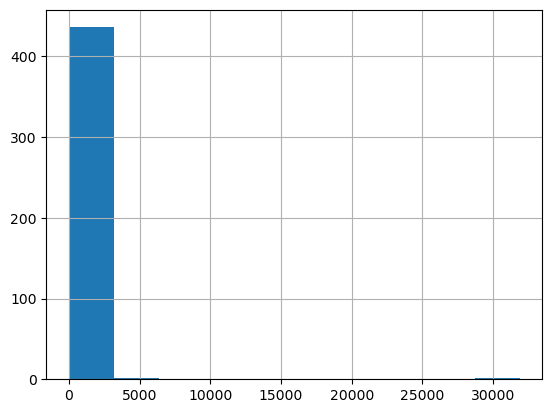

In [45]:
df_train['number_of_comments'].value_counts().hist()

## we can see that the number of comments in the next 24 hours usually less than 5000, but we still have values where there are 30000 and more

In [48]:
df_train[df_train['number_of_comments'] < 450]['number_of_comments'].count()

49121

0

## We can seee that there are no comments in range 5000 and 10000 in the next 24 hours 

In [65]:
df_train[df_train['number_of_comments'] > 5000].sum()

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
276       0.0
277       0.0
278       0.0
279       0.0
target    0.0
Length: 281, dtype: float64